In [1]:
import numpy as np
import matplotlib.pyplot as graph
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

graph.style.use('fivethirtyeight')

/home/harshil/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Preprocess data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

for dataset in [train_images, train_labels, test_images, test_labels]:
    print(dataset.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


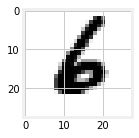

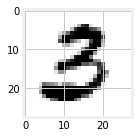

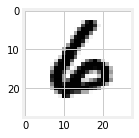

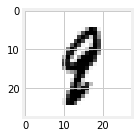

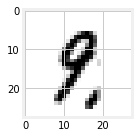

In [3]:
# Example images
for _ in range(5):
    graph.figure(figsize=(2, 2))
    idx = np.random.randint(train_images.shape[0])
    graph.imshow(train_images[idx, :, :], cmap='binary')
    graph.show()

In [4]:
def preprocess_data(data):
    assert len(data.shape) == 3
    
    print('current shape: {}'.format(data.shape))
    data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
    print('reshaped: {}'.format(data.shape))
    
    return data.astype('float32') / 255

train_images = preprocess_data(train_images)
test_images = preprocess_data(test_images)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

current shape: (60000, 28, 28)
reshaped: (60000, 784)
current shape: (10000, 28, 28)
reshaped: (10000, 784)


# Deep FeedForward Neural Network

In [5]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(train_images.shape[1],)))
network.add(layers.Dense(10, activation='softmax'))

In [6]:
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.2565 - acc: 0.9251
Epoch 2/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.1045 - acc: 0.9697
Epoch 3/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0689 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.0503 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0375 - acc: 0.9891


In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: {}'.format(test_acc))

10000/10000 [==============================] - 1s 55us/step
test_acc: 0.979


# Convolutional Neural Network

In [13]:
def preprocess_data(data):
    assert len(data.shape) == 3
    
    print('current shape: {}'.format(data.shape))
    data = data.reshape(data.shape[0], data.shape[1], data.shape[2], 1)
    print('reshaped: {}'.format(data.shape))
    
    return data.astype('float32') / 255

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = preprocess_data(train_images)
test_images = preprocess_data(test_images)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

current shape: (60000, 28, 28)
reshaped: (60000, 28, 28, 1)
current shape: (10000, 28, 28)
reshaped: (10000, 28, 28, 1)


In [12]:
conv = models.Sequential()
conv.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
conv.add(layers.MaxPooling2D((2, 2)))
conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv.add(layers.MaxPooling2D((2, 2)))
conv.add(layers.Conv2D(64, (3, 3), activation='relu'))

conv.add(layers.Flatten())
conv.add(layers.Dense(64, activation='relu'))
conv.add(layers.Dense(10, activation='softmax'))

conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

In [14]:
conv.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

conv.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 46s 767us/step - loss: 0.1881 - acc: 0.9406
Epoch 2/5
60000/60000 [==============================] - 47s 790us/step - loss: 0.0493 - acc: 0.9847
Epoch 3/5
60000/60000 [==============================] - 48s 799us/step - loss: 0.0341 - acc: 0.9896
Epoch 4/5
60000/60000 [==============================] - 50s 834us/step - loss: 0.0254 - acc: 0.9920
Epoch 5/5
60000/60000 [==============================] - 51s 857us/step - loss: 0.0205 - acc: 0.9937


In [16]:
test_loss, test_acc = conv.evaluate(test_images, test_labels)
print('test_acc: {}'.format(test_acc))

10000/10000 [==============================] - 3s 264us/step
test_acc: 0.9926
